<a href="https://colab.research.google.com/github/pannhapat/Python_Tutorials/blob/master/nl_kbtg_covid19_sheets_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

authen ก่อน จะได้เปิด sheets ได้

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


นำเข้าข้อมูลจาก Google Sheets

In [0]:
# Load from sheet
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1o0HqNGX5AsR9JawvL2CnW-fWQ9QUkHRn72reJeJPlNw/edit#gid=1354638512')
sheet = wb.sheet1

# Skip header
data = sheet.get_all_values()[1:]

เอาเฉพาะ column **Confirmed**

In [0]:
import pandas as pd
df = pd.DataFrame(data)
confirmed = pd.to_numeric(df[5])

# Date range
start = 20
Y = confirmed.tolist()[start:]
X = [i+1 for i in range(len(Y))]

ลองใช้กราฟทำนายเลข **Confirmed** วันถัดไป

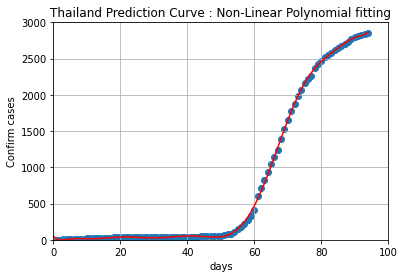

Tomorrow will be  2860.597563204043
Increase  6.5975632040431265


In [7]:
"""
Created on Mon Mar 30 12:10:59 2020
author: yuen
ref : https://www.facebook.com/photo.php?fbid=10219226773277783&set=pcb.10219226774877823&type=3&theater

publisher : NL x KBTG
forked : katopz, ying @ NoobLearning
ref : 
"""

import numpy as np
import matplotlib.pyplot as plt

# Nonlinear Regression Analysis (Polynomial)
degree = 12
fit = len(Y)
poly_fit = np.poly1d(np.polyfit(X, Y, degree))

# Plot data
xx = np.linspace(0, fit, 100)
plt.plot(xx, poly_fit(xx), c='r', linestyle='-')
plt.title('Thailand Prediction Curve : Non-Linear Polynomial fitting')
plt.xlabel('days')
plt.ylabel('Confirm cases')
plt.axis([0, 100, 0, 3000])
plt.grid(True)
plt.scatter(X, Y)

plt.show()

# Predict data
predictedConfirmed = poly_fit(fit)
print('Tomorrow will be ', predictedConfirmed)
print('Increase ', predictedConfirmed - confirmed[-1:].tolist()[0])
